# Basic usage of `plot_hist`

Here we demonstrate the basic usage of `plot_hist`, which plots histogram(s) for a given dataset. Below we first import the module needed for showing images in the jupyter notebook.

In [1]:
from IPython.display import Image

Before we show some examples, let's first take a look at what arguments can be passed to `plot_hist`. In the example below, we assume that the user has been properly installed the package such that the command `plot_hist` is available.

In [2]:
%%bash
plot_hist -h

usage: plot_hist [-h] [-i INPUT [INPUT ...]] [-l LEGEND [LEGEND ...]]
                 [-x XLABEL] [-y YLABEL] [-c COLUMN] [-t TITLE] [-n PNGNAME]
                 [-nb NBINS] [-nr]
                 [-cc {degree to radian,radian to degree,kT to kcal/mol,kcal/mol to kT,kT to kJ/mol,kJ/mol to kT,kJ/mol to kcal/mol,kcal/mol to kJ/mol,ns to ps,ps to ns}]
                 [-ff FACTOR] [-T TEMP] [-ol] [-tr TRUNCATE] [-trb TRUNCATE_B]
                 [-Nb NR_BOUND [NR_BOUND ...]] [-lc LEGEND_COL] [-d DIR]
                 [-o OUTPUT]

This code plots a hisotgram given the data of a variable.

optional arguments:
  -h, --help            show this help message and exit
  -i INPUT [INPUT ...], --input INPUT [INPUT ...]
                        The filename(s) of the input(s). Wildcards can be
                        used.
  -l LEGEND [LEGEND ...], --legend LEGEND [LEGEND ...]
                        Legends of the histograms.
  -x XLABEL, --xlabel XLABEL
                        The name and unit

As shown above, `plot_hist` has a lot of functionalities similar to the ones available in `plot_xy`, including the scaling and truncation of the input data. For more examples of these functionalities, please visit the tutorial of `plot_xy`. In the examples below, we use `HILLS_2D` and `corrupted_HILLS` as the input data, which are in the folder `MD_plotting_toolkit/data` and `MD_plotting_toolkit/tests/sample_inputs`, respectively.

## Example 1: The most commonly used functionalities of `plot_hist`

As a succinct example, below we show a command using some of the most commonly used functionalities of `plot_hist` despite the fact that the user can use a command as simple as `plot_hist -i {input}` to plot the data.

In [3]:
%%bash
hills=../../MD_plotting_toolkit/data/HILLS_2D  # just to shorten the command below
plot_hist -i ${hills} -x "Alchemical state" -c 2 -t "Alchemical distribution" -nb 9 -n "lambda_distribution" -tr 10 -trb 10 -ol 


Data analysis of the file: ../../MD_plotting_toolkit/data/HILLS_2D
- Working directory: /Users/Wei-TseHsu/Documents/Life in CU Bouler/Research in Shirts Lab/Code_development/GitHub/MD_plotting_toolkit/docs/examples
- Command line: /usr/local/bin/plot_hist -i ../../MD_plotting_toolkit/data/HILLS_2D -x Alchemical state -c 2 -t Alchemical distribution -nb 9 -n lambda_distribution -tr 10 -trb 10 -ol
Analyzing the file ... 
Plotting and saving figure ...
Maximum of count: 8.000, which occurs at 303.000.
Minimum of count: 0.000, which occurs at 324.000.
N_ratio = 1.716
Figure(640x480)


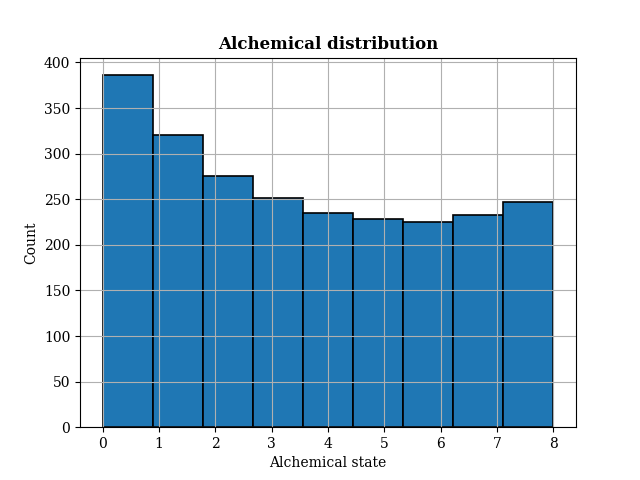

In [4]:
Image("lambda_distribution.png", width=400)

As shown above, the command above plotted a histogram of the third column in the input dataset, with the first and last 10% of the time series truncated. The x-axis, the title and the filename of fthe output were also specified, while the y-axis was set as "Count", which is the default name if the flag `-nr` was not used to normalize the counts. In addition, the nubmer of bins were set as 8 to overwrite the default value of 200. Except for the maximum and the minimum counts, the value of $N_{\text{ratio}}$ was also calculated and printed, which can be regarded as a simple measure of the flatness of the histogram, with 1 corresponding to a perfectly flat distribution. Lastly, the flat `-ol` was used to plot the histogram outlines.

## Example 2: Assessment of the flatness of a histogram

To make the calculation of $N_{\text{ratio}}$ more flexible, the user is allowed to specify the bounds of the input data for the calculation through the flag `-Nb`. As an example, the command below plots 2 histogram given 2 datasets and $N_{\text{ratio}}$ was calculated by only considering the dihedral in the range from -60 degrees to 60 degrees. Note that the values passed through `-Nb` should reflect the specified unit conversions, if any. That's why we passed -60 and 60 instead of $-1/3 \pi$ and $1/3 \pi$. As a result, it can be seen that within the range from -60 to 60 degrees, trial 2 had a flatter distrubition than the other due to a lower value of $N_{\text{ratio}}$. Also note the data is not truncated when the flag `-Nb` is used, meaning that the histograms still range from -180 degrees to 180 degrees. 

In [5]:
%%bash
hills_1=../../MD_plotting_toolkit/data/HILLS_2D  # just to shorten the command below
hills_2=../../MD_plotting_toolkit/tests/sample_inputs/corrupted_HILLS  # just to shorten the command below
plot_hist -i ${hills_1} ${hills_2} -x "Dihedral (deg)" -cc "radian to degree" -nr -Nb -60 60 -t "Dihedral distribution" -nb 100 -n "dihedral_distribution" -l "Trial 1" "Trial 2"


Data analysis of the file: ../../MD_plotting_toolkit/data/HILLS_2D
- Working directory: /Users/Wei-TseHsu/Documents/Life in CU Bouler/Research in Shirts Lab/Code_development/GitHub/MD_plotting_toolkit/docs/examples
- Command line: /usr/local/bin/plot_hist -i ../../MD_plotting_toolkit/data/HILLS_2D ../../MD_plotting_toolkit/tests/sample_inputs/corrupted_HILLS -x Dihedral (deg) -cc radian to degree -nr -Nb -60 60 -t Dihedral distribution -nb 100 -n dihedral_distribution -l Trial 1 Trial 2
Analyzing the file ... 
Plotting and saving figure ...
Maximum of probability density: 179.893, which occurs at 2752.000 deg.
Minimum of probability density: -179.811, which occurs at 1750.000 deg.
N_ratio = 6.000

Data analysis of the file: ../../MD_plotting_toolkit/tests/sample_inputs/corrupted_HILLS
- Working directory: /Users/Wei-TseHsu/Documents/Life in CU Bouler/Research in Shirts Lab/Code_development/GitHub/MD_plotting_toolkit/docs/examples
- Command line: /usr/local/bin/plot_hist -i ../../MD_pl

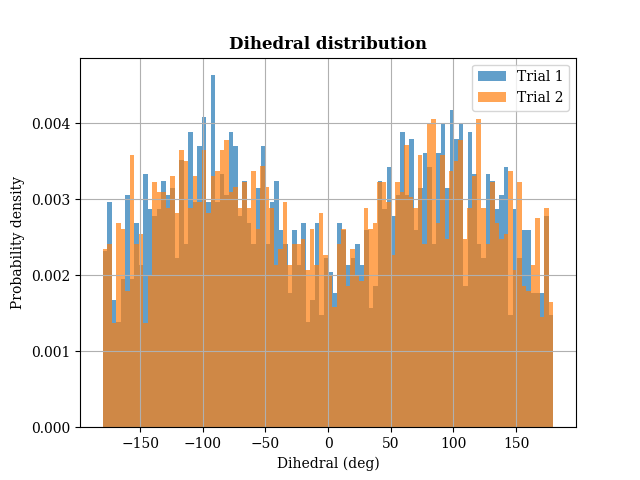

In [6]:
Image("dihedral_distribution.png", width=400)

Additionally, note that in the command above, the flat `-nr` was used to plot the normalized counts instead, which was the probability density. Also, when more than 1 histogram is plotted, the transparency of each histogram will be set as 0.7 to better show the overlapped and non-overlapped regions.

---
Below we delete the output files generated in this tutorial to make the repository as lightweight as possible.

In [7]:
import os, glob
files = glob.glob('*.png')
files.extend(glob.glob('*txt'))
for i in files:
    os.remove(i)